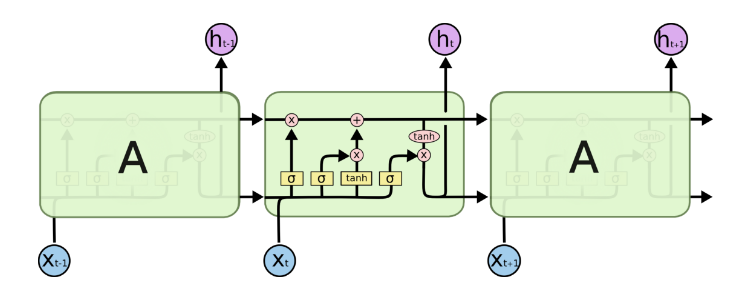

\begin{align*}
f_t &= \sigma(W_f \cdot [h_{t-1}, x_t] + b_f) \\
i_t &= \sigma(W_i \cdot [h_{t-1}, x_t] + b_i) \\
o_t &= \sigma(W_o \cdot [h_{t-1}, x_t] + b_o) \\
\tilde{C}_t &= \tanh(W_C \cdot [h_{t-1}, x_t] + b_C) \\
C_t &= f_t * C_{t-1} + i_t * \tilde{C}_t \\
h_t &= o_t * \tanh(C_t)
\end{align*}

上述式子中，$W_f$, $W_i$, $W_o$, $W_C$，以及对应的偏置，都是没有时间t标识的，证明是不随时间变化的


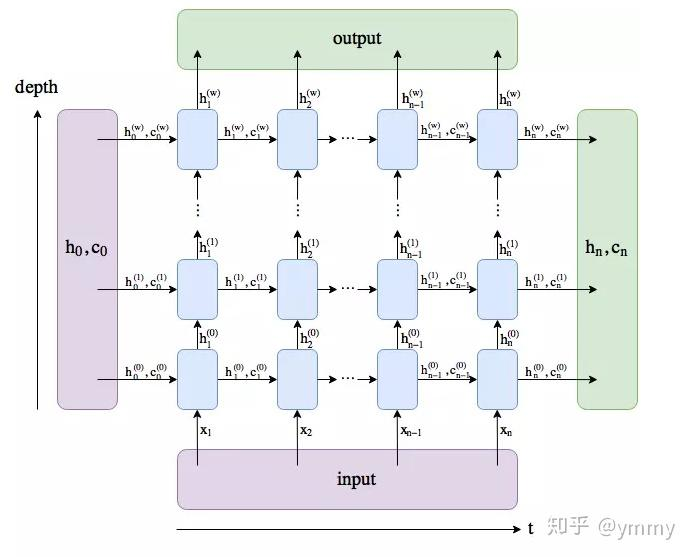

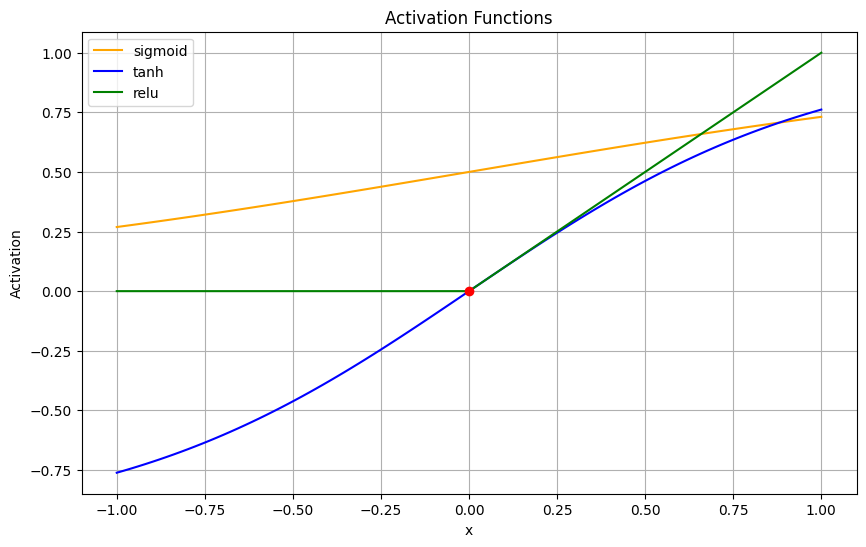

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 定义激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# 生成输入数据
x = np.linspace(-1, 1, 100)

# 计算激活函数的输出
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)

# 画图
plt.figure(figsize=(10, 6))
plt.plot(x, y_sigmoid, label='sigmoid', color='orange')
plt.plot(x, y_tanh, label='tanh', color='blue')
plt.plot(x, y_relu, label='relu', color='green')

# 标记原点
plt.scatter([0], [sigmoid(0)], color='red', zorder=5)
plt.scatter([0], [tanh(0)], color='red', zorder=5)
plt.scatter([0], [relu(0)], color='red', zorder=5)

plt.title('Activation Functions')
plt.xlabel('x')
plt.ylabel('Activation')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
import random
import numpy as np

In [11]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))

def sigmoid_derivative(values):
    return values * (1 - values)

def tanh_derivative(values):
    return 1. - values ** 2

def random_array(a, b, *args):
    np.random.seed(0)
    return np.random.rand(*args) * (b - a) + a  # 将生成的随机数数组按比例缩放到区间[𝑎,𝑏]

class LSTMParameters:
    def __init__(self, cell_count, x_dim):
        """
        初始化LSTM参数。
        
        Parameters:
        - cell_count: LSTM单元的数量
        - x_dim: 输入数据的维度
        """
        self.cell_count = cell_count  # LSTM单元的数量，同时也是hidden_state
        self.x_dim = x_dim  # 输入数据的维度
        input_concatenated_length = x_dim + cell_count  # 输入数据和隐藏状态拼接后的长度
        
        self.weight_c = random_array(-0.1, 0.1, cell_count, input_concatenated_length)  # 输入到门控状态的权重
        self.weight_i = random_array(-0.1, 0.1, cell_count, input_concatenated_length)  # 输入到输入门的权重
        self.weight_f = random_array(-0.1, 0.1, cell_count, input_concatenated_length)  # 输入到遗忘门的权重
        self.weight_o = random_array(-0.1, 0.1, cell_count, input_concatenated_length)  # 输入到输出门的权重
        
        self.bias_c = random_array(-0.1, 0.1, cell_count)  # 门控状态的偏置
        self.bias_i = random_array(-0.1, 0.1, cell_count)  # 输入门的偏置
        self.bias_f = random_array(-0.1, 0.1, cell_count)  # 遗忘门的偏置
        self.bias_o = random_array(-0.1, 0.1, cell_count)  # 输出门的偏置
        
        self.weight_c_diff = np.zeros((cell_count, input_concatenated_length))  # 门控状态权重的梯度
        self.weight_i_diff = np.zeros((cell_count, input_concatenated_length))  # 输入门权重的梯度
        self.weight_f_diff = np.zeros((cell_count, input_concatenated_length))  # 遗忘门权重的梯度
        self.weight_o_diff = np.zeros((cell_count, input_concatenated_length))  # 输出门权重的梯度
        
        self.bias_c_diff = np.zeros(cell_count)  # 门控状态偏置的梯度
        self.bias_i_diff = np.zeros(cell_count)  # 输入门偏置的梯度
        self.bias_f_diff = np.zeros(cell_count)  # 遗忘门偏置的梯度
        self.bias_o_diff = np.zeros(cell_count)  # 输出门偏置的梯度

    def apply_diff(self, lr=1):
        """
        根据梯度更新参数。

        Parameters:
        - lr: 学习率，默认为1
        """
        self.weight_c -= lr * self.weight_c_diff
        self.weight_i -= lr * self.weight_i_diff
        self.weight_f -= lr * self.weight_f_diff
        self.weight_o -= lr * self.weight_o_diff
        self.bias_c -= lr * self.bias_c_diff
        self.bias_i -= lr * self.bias_i_diff
        self.bias_f -= lr * self.bias_f_diff
        self.bias_o -= lr * self.bias_o_diff

        # 重置梯度为零
        self.weight_c_diff = np.zeros_like(self.weight_c)
        self.weight_i_diff = np.zeros_like(self.weight_i)
        self.weight_f_diff = np.zeros_like(self.weight_f)
        self.weight_o_diff = np.zeros_like(self.weight_o)
        self.bias_c_diff = np.zeros_like(self.bias_c)
        self.bias_i_diff = np.zeros_like(self.bias_i)
        self.bias_f_diff = np.zeros_like(self.bias_f)
        self.bias_o_diff = np.zeros_like(self.bias_o)


class LSTMState:
    def __init__(self, cell_count, x_dim):
        """
        初始化LSTM单元的状态。

        Parameters:
        - cell_count: LSTM单元的数量
        - x_dim: 输入数据的维度
        """
        self.gate = np.zeros(cell_count)  # 门控状态
        self.input_gate = np.zeros(cell_count)  # 输入门的输出
        self.forget_gate = np.zeros(cell_count)  # 遗忘门的输出
        self.output_gate = np.zeros(cell_count)  # 输出门的输出
        self.cell_state = np.zeros(cell_count)  # 细胞状态
        self.hidden_state = np.zeros(cell_count)  # 隐藏状态
        self.bottom_diff_hidden = np.zeros_like(self.hidden_state)  # 隐藏状态的梯度
        self.bottom_diff_cell = np.zeros_like(self.cell_state)  # 细胞状态的梯度


class LSTMNode:
    def __init__(self, lstm_param, lstm_state):
        """初始化LSTM节点。

        Parameters:
        -lstm_param: LSTM参数
        -lstm_state: LSTM状态
        """
        self.state = lstm_state
        self.param = lstm_param
        self.x_concatenated = None

    def bottom(self, x, prev_cell_state=None, prev_hidden_state=None):
        """设置当前节点的输入数据。
        Parameters:
        -X：输入数据
        -prev_cell_state：上一时刻的细胞状态，默认为零向量
        -prev_hidden_state：上一时刻的隐藏状态，默认为零向量
        """
        if prev_cell_state is None:
            prev_cell_state = np.zeros_like(self.state.cell_state)
        if prev_hidden_state is None:
            prev_hidden_state = np.zeros_like(self.state.hidden_state)
        self.prev_cell_state = prev_cell_state
        self.prev_hidden_state = prev_hidden_state
        # 将输入数据和上一时刻的隐藏状态拼接
        self.x_concatenated = np.hstack((x, prev_hidden_state))
        # 计算门控状态、输入门、遗忘门和输出门的输出
        self.state.gate = np.tanh(np.dot(self.param.weight_c, self.x_concatenated) + self.param.bias_c)
        self.state.input_gate = sigmoid(np.dot(self.param.weight_i, self.x_concatenated) + self.param.bias_i)
        self.state.forget_gate = sigmoid(np.dot(self.param.weight_f, self.x_concatenated) + self.param.bias_f)
        self.state.output_gate = sigmoid(np.dot(self.param.weight_o, self.x_concatenated) + self.param.bias_o)
        # 计算当前时刻的细胞状态和隐藏状态
        self.state.cell_state = self.state.gate * self.state.input_gate + prev_cell_state * self.state.forget_gate
        self.state.hidden_state = np.tanh(self.state.cell_state) * self.state.output_gate

    def diff_(self, top_diff_hidden, top_diff_cell):
        """计算当前节点的梯度。
        Parameters:
        -top_diff_hidden：上一时刻的隐藏状态的梯度
        -top_diff_cell：上一时刻的细胞状态的梯度
        """

        # 计算细胞状态的梯度
        ds = self.state.output_gate * tanh_derivative(np.tanh(self.state.cell_state)) * top_diff_hidden + top_diff_cell
        # 计算输出门的梯度
        do = np.tanh(self.state.cell_state) * top_diff_hidden
        # 计算输入门的梯度
        di = self.state.gate * ds
        # 计算门控状态的梯度
        dc = self.state.input_gate * ds
        # 计算遗忘门的梯度
        df = self.prev_cell_state * ds
        # 计算输入门的梯度对输入的导数
        di_input = sigmoid_derivative(self.state.input_gate) * di
        # 计算遗忘门的梯度对输入的导数
        df_input = sigmoid_derivative(self.state.forget_gate) * df
        # 计算输出门的梯度对输入的导数
        do_input = sigmoid_derivative(self.state.output_gate) * do
        # 计算门控状态的梯度对输入的导数
        dc_input = tanh_derivative(self.state.gate) * dc

        # 更新权重的梯度
        self.param.weight_i_diff += np.outer(di_input, self.x_concatenated)
        self.param.weight_f_diff += np.outer(df_input, self.x_concatenated)
        self.param.weight_o_diff += np.outer(do_input, self.x_concatenated)
        self.param.weight_c_diff += np.outer(dc_input, self.x_concatenated)

        # 更新偏适的梯度
        self.param.bias_i_diff += di_input
        self.param.bias_f_diff += df_input
        self.param.bias_o_diff += do_input
        self.param.bias_c_diff += dc_input

        # 计算输入的梯度
        dxc = np.zeros_like(self.x_concatenated)
        dxc += np.dot(self.param.weight_i.T, di_input)
        dxc += np.dot(self.param.weight_f.T, df_input)
        dxc += np.dot(self.param.weight_o.T, do_input)
        dxc += np.dot(self.param.weight_c.T, dc_input)

        # 更新细胞状态和隐藏状态的梯度
        self.state.bottom_diff_cell = ds * self.state.forget_gate
        self.state.bottom_diff_hidden = dxc[self.param.x_dim:]


class LSTMNetwork:
    def __init__(self, lstm_param):
        self.lstm_param = lstm_param
        self.lstm_node_list = []
        self.x_list = []

    def y_list(self, y_list, loss_layer):
        # 确保输入和标签序列的长度相等
        assert len(y_list) == len(self.x_list)
        idx = len(self.x_list) - 1
        loss = 0

        # 计算最后一个节点的损失和梯度
        loss += loss_layer.loss(self.lstm_node_list[idx].state.hidden_state, y_list[idx])
        diff_hidden = loss_layer.bottom_diff(self.lstm_node_list[idx].state.hidden_state, y_list[idx])
        diff_cell = np.zeros(self.lstm_param.cell_count)
        self.lstm_node_list[idx].diff_(diff_hidden, diff_cell)
        idx -= 1

        # 逐个节点计算损失和梯度
        while idx >= 0:
            # 计算当前节点的损失和梯度
            loss += loss_layer.loss(self.lstm_node_list[idx].state.hidden_state, y_list[idx])
            diff_hidden = loss_layer.bottom_diff(self.lstm_node_list[idx].state.hidden_state, y_list[idx])
            # 将来自下一节点的梯度加到当前节点的梯度上
            diff_hidden += self.lstm_node_list[idx + 1].state.bottom_diff_hidden
            diff_cell = self.lstm_node_list[idx + 1].state.bottom_diff_cell
            # 计算当前节点的梯度
            self.lstm_node_list[idx].diff_(diff_hidden, diff_cell)
            idx -= 1

        return loss
    
    def x_list_clear(self):
        self.x_list = []

    def x_list_add(self, x):
        self.x_list.append(x)
        # 将新的输入数据x添加到输入序列列表self.x_list中
        if len(self.x_list) > len(self.lstm_node_list):  # 如果输入序列的长度大于LSTM节点列表的长度
            lstm_state = LSTMState(self.lstm_param.cell_count, self.lstm_param.x_dim)  # 创建一个新的LSTM状态对象
            self.lstm_node_list.append(LSTMNode(self.lstm_param, lstm_state))  # 创建一个新的LSTM节点对象并添加到LSTM节点列表中
        idx = len(self.x_list) - 1  # 获取当前输入数据在输入序列列表中的索引
        if idx == 0:  # 如果当前索引为0，即这是第一个输入数据
            self.lstm_node_list[idx].bottom(x)  # 调用第一个LSTM节点的bottom方法，仅传递输入数据x
        else:  # 如果当前索引不为0，即这是后续的输入数据
            prev_cell_state = self.lstm_node_list[idx - 1].state.cell_state  # 获取前一个时间步的细胞状态
            prev_hidden_state = self.lstm_node_list[idx - 1].state.hidden_state  # 获取前一个时间步的隐藏状态
            self.lstm_node_list[idx].bottom(x, prev_cell_state, prev_hidden_state)  # 调用当前LSTM节点的bottom方法

 
class LossLayer:
    @staticmethod
    def loss(prediction, target):
        """计算预测值与目标值之间的平方差作为损失"""
        return (prediction[0] - target) ** 2

    @staticmethod
    def bottom_diff(prediction, target):
        """计算损失函数对预测值的导数，导数是误差乘以2"""
        diff = np.zeros_like(prediction)
        diff[0] = 2 * (prediction[0] - target)
        return diff


In [12]:
def example():
    np.random.seed(0)  # 设置随机种子，保持结果的可重复性
    mem_cell_ct = 100  # cell_count参数，定义LSTM网络的参数
    x_dim = 50  # 输入数据的维度

    # 初始化LSTM参数和网络
    lstm_param = LSTMParameters(mem_cell_ct, x_dim)
    lstm_net = LSTMNetwork(lstm_param)

    # 定义目标输出序列
    y_list = [-0.5, 0.2, 0.1, -0.5, 0.1]

    # 生成输入数据
    input_val_arr = [np.random.random(x_dim) for _ in y_list]

    # 迭代训练模型
    for cur_iter in range(100):
        print("Iteration", "%2s" % str(cur_iter), end=":")
        
        # 将输入数据添加到LSTM网络中
        for ind in range(len(y_list)):
            lstm_net.x_list_add(input_val_arr[ind])

        # 打印预测结果
        print("Predictions = [" +
              ", ".join(["% 2.5f" % lstm_net.lstm_node_list[ind].state.hidden_state[0] for ind in range(len(y_list))])
              + "]", end=", ")

        # 计算损失并打印
        loss = lstm_net.y_list(y_list, LossLayer)
        print("Loss:", "%.3e" % loss)

        # 更新参数
        lstm_param.apply_diff(lr=0.1)

        # 清空输入数据，为下一次迭代做准备
        lstm_net.x_list_clear()
if __name__ == "__main__":
    example()

Iteration  0:Predictions = [ 0.04127,  0.06923,  0.11705,  0.16441,  0.13306], Loss: 7.529e-01
Iteration  1:Predictions = [-0.20762, -0.28182, -0.32942, -0.35108, -0.33329], Loss: 7.120e-01
Iteration  2:Predictions = [-0.14169, -0.17777, -0.21003, -0.22009, -0.20322], Loss: 5.375e-01
Iteration  3:Predictions = [-0.12698, -0.14783, -0.17683, -0.18967, -0.16710], Loss: 5.044e-01
Iteration  4:Predictions = [-0.12237, -0.13269, -0.16074, -0.17820, -0.14923], Loss: 4.869e-01
Iteration  5:Predictions = [-0.12221, -0.12372, -0.15177, -0.17462, -0.13884], Loss: 4.738e-01
Iteration  6:Predictions = [-0.12467, -0.11802, -0.14660, -0.17541, -0.13237], Loss: 4.622e-01
Iteration  7:Predictions = [-0.12893, -0.11424, -0.14369, -0.17900, -0.12820], Loss: 4.509e-01
Iteration  8:Predictions = [-0.13456, -0.11164, -0.14220, -0.18453, -0.12545], Loss: 4.397e-01
Iteration  9:Predictions = [-0.14125, -0.10972, -0.14158, -0.19141, -0.12356], Loss: 4.282e-01
Iteration 10:Predictions = [-0.14877, -0.10813, -0